<a href="https://colab.research.google.com/github/Vinuji-Hewapathirana/Machine-Learning---Coursework/blob/main/ML_RFC_full_classweights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_csv('bank-additional-full.csv', sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# Drop the 'duration' column
data = data.drop(columns=['duration','contact'])

# Display the first few rows to verify
data.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
#Prepare features and target
X = data.drop(columns=['y'])
y = data['y']

print(f"Input features (X): {X.shape}")
print(f"Target variable (y): {y.shape}")

#encoding the y attribute
y_encoded = y.map({'yes':1, 'no':0})
print(y_encoded.head())

Input features (X): (41188, 18)
Target variable (y): (41188,)
0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64


Classification Report with Class Weights
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7310
           1       0.56      0.27      0.36       928

    accuracy                           0.89      8238
   macro avg       0.74      0.62      0.65      8238
weighted avg       0.87      0.89      0.88      8238

ROC-AUC Score with Class Weights: 0.7710959980423605


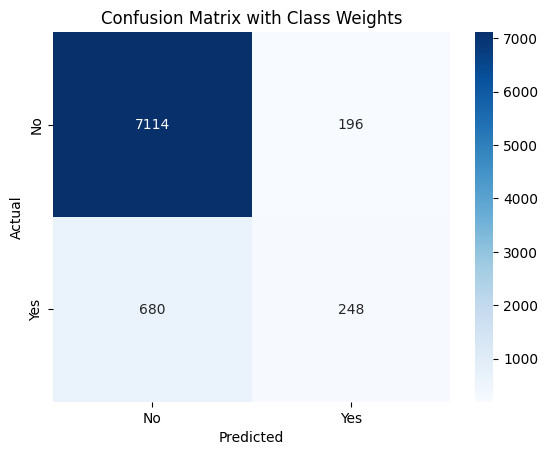


Top 10 Important Features:
             Feature  Importance
0                age    0.140673
7          euribor3m    0.133218
1           campaign    0.078463
8        nr.employed    0.065387
4       emp.var.rate    0.044276
6      cons.conf.idx    0.027254
5     cons.price.idx    0.024363
36        housing_no    0.019088
38       housing_yes    0.018455
59  poutcome_success    0.016825


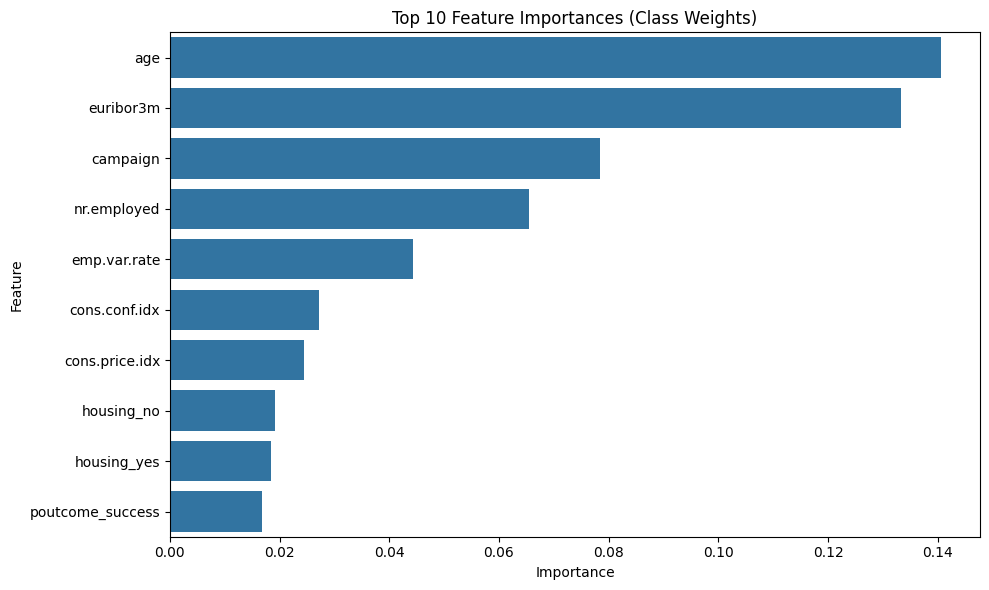

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessing transformers
# Numeric preprocessing: Impute missing values with mean and scale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical preprocessing: Impute missing values with mode and encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps for numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create the pipeline with class weights in the RandomForestClassifier
pipeline_class_weights = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced'))
])

# Train the pipeline
pipeline_class_weights.fit(X_train, y_train)

# Evaluate the model
y_pred_class_weights = pipeline_class_weights.predict(X_test)
y_prob_class_weights = pipeline_class_weights.predict_proba(X_test)[:, 1]

# Classification Report
print("Classification Report with Class Weights")
print(classification_report(y_test, y_pred_class_weights))

# Calculate and print the ROC-AUC Score
print("ROC-AUC Score with Class Weights:", roc_auc_score(y_test, y_prob_class_weights))

# Visualize the confusion matrix
conf_matrix_class_weights = confusion_matrix(y_test, y_pred_class_weights)
sns.heatmap(conf_matrix_class_weights, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix with Class Weights")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Extract Feature Importance
# Get the RandomForestClassifier from the pipeline
model_class_weights = pipeline_class_weights.named_steps['classifier']

# Get the feature names for numeric and categorical features
categorical_feature_names = pipeline_class_weights.named_steps['preprocessor'].named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
feature_names = np.concatenate([numeric_features, categorical_feature_names])

# Get feature importances
feature_importances = model_class_weights.feature_importances_

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display top 10 features
print("\nTop 10 Important Features:")
print(importance_df.head(10))

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Feature Importances (Class Weights)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()